In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import keras

In [2]:
from keras.datasets import mnist


In [3]:
(trainX, trainY ) , (testX , testY) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
len(trainX)

60000

In [5]:
trainX.shape

(60000, 28, 28)

In [6]:
def preprocess_image(dataset):
  dataset = dataset/255.0
  dataset = np.expand_dims(dataset , axis=-1)

  return dataset

In [7]:
data = preprocess_image(trainX)

In [8]:
data.shape

(60000, 28, 28, 1)

In [ ]:
data[1]

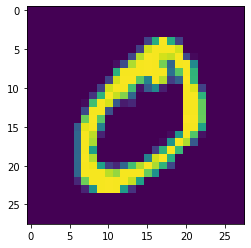

In [10]:
plt.imshow(trainX[1]);


In [29]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.InputLayer(input_shape = (28,28,1)),
                                    tf.keras.layers.Conv2D(32, (2,2) , padding = 'same' ,activation = 'relu' ),
                                    tf.keras.layers.MaxPool2D((2,2) ),
                                    tf.keras.layers.Conv2D(64,(2,2) , activation = 'relu'),
                                    tf.keras.layers.Conv2D(64,(2,2) ,activation = 'relu'),
                                    tf.keras.layers.MaxPool2D((2,2) ),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(100 , activation ='relu'),
                                    tf.keras.layers.Dense(10,activation = 'softmax')
])

# model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'] , optimizer = tf.keras.optimizers.SGD())
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'] , optimizer = tf.keras.optimizers.Adam())
# changing from categorical crossentropy to sparse 

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        8256      
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 64)        16448     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 2304)             

In [30]:
model.fit(data , trainY , batch_size = 32 , epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1303 - accuracy: 0.9594
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0446 - accuracy: 0.9858
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0300 - accuracy: 0.9905
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0224 - accuracy: 0.9929
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0170 - accuracy: 0.9944


In [26]:
test_data = preprocess_image(testX)

In [33]:
pred_arr = model.predict(test_data)

In [28]:
model.evaluate(test_data, testY)

313/313 [==============================] - 1s 4ms/step - loss: 0.0676 - accuracy: 0.9772


[0.06763511896133423, 0.9771999716758728]

# Our mnist model has loss: 0.0676 - accuracy: 0.9772